## Barcelona data

Data sets from the Website [**Open Data BCN**](https://opendata-ajuntament.barcelona.cat/en), the Ajuntament de Barcelona's open data service.  

### Barcelona rent

#### Compare the rent of the districts and the barrios in Barcelona in 2018

<img src="http://guiadebcn.com/wp-content/uploads/2017/07/mapa-barrios-de-barcelona.jpg" style="height:500px" >
<p>Use the data of rent from 2015 to 2018 to visualize the difference of the districts and barrios and the trend in those years. </p>

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
rent_2018 = pd.read_csv('data/2018_lloguer_preu_trim.csv')
rent_2018.info()
rent_2018.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.000000,584.000000,584.000000,540.000000
mean,2018.0,2.500000,6.246575,37.000000,443.435852
std,0.0,1.118992,2.790726,21.089371,461.425738
min,2018.0,1.000000,1.000000,1.000000,7.220000
25%,2018.0,1.750000,4.000000,19.000000,12.630000
50%,2018.0,2.500000,7.000000,37.000000,226.335000
75%,2018.0,3.250000,8.000000,55.000000,817.672500
max,2018.0,4.000000,10.000000,73.000000,1849.520000


In [3]:
# 73 Barri 
barri = rent_2018.iloc[:73, 2:6]
# df of district name & barri 
dist_barri = barri.groupby(['Codi_Districte', 'Nom_Districte'])[['Codi_Barri']].max()
dist_barri.reset_index(inplace=True)
dist_barri = dist_barri.sort_values(by=['Codi_Barri']) ; dist_barri

,Codi_Districte,Nom_Districte,Codi_Barri
0,1,Ciutat Vella,4
1,2,Eixample,10
2,3,Sants-Montjuïc,18
3,4,Les Corts,21
4,5,Sarrià-Sant Gervasi,27
5,6,Gràcia,32
6,7,Horta-Guinardó,43
7,8,Nou Barris,56
8,9,Sant Andreu,63
9,10,Sant Martí,73


In [4]:
## dealing with NA
print('The Barri that contain Na: \n', rent_2018[rent_2018.Preu.isna()].Nom_Barri.unique())
# drop the rows that contain NA in the 'Preu' column (6 barri)
rent_2018 = rent_2018.dropna(how='any')
rent_2018.Lloguer_mitja.replace('Lloguer mitjà mensual (Euros/mes)', 'per_month', inplace=True)
rent_2018.Lloguer_mitja.replace('Lloguer mitjà per superfície (Euros/m2 mes)', 'per_m2', inplace=True)

The Barri that contain Na: 
 ['la Marina del Prat Vermell' 'la Clota' 'Can Peguera' 'Torre Baró'
 'Vallbona' 'Baró de Viver']


In [5]:
# group by the way it counts the price & district code
district_mean_price = rent_2018.groupby(['Lloguer_mitja', 'Codi_Districte'])[['Preu']].mean()
district_mean_price.reset_index(inplace=True)
district_mean_price_p = district_mean_price.pivot(index='Codi_Districte', columns = 'Lloguer_mitja'); district_mean_price_p

Preu             
Lloguer_mitja      per_m2    per_month
Codi_Districte                        
1               14.932500   929.106250
2               13.656667  1024.575000
3               12.663214   799.807143
4               14.704167  1238.325833
5               15.192083  1254.222500
6               13.400000   873.446000
7               11.717250   750.917750
8               10.827561   648.947561
9               11.279200   731.195200
10              13.408500   919.760000

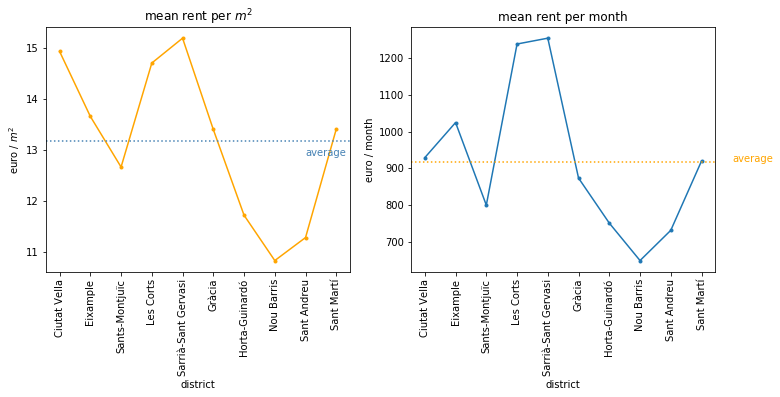

In [6]:
# The higher the average rent per month, the higher the average rent per square meters?
# --> The average area will have less variation than average rent?
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = False, figsize = (12, 4.5)) 
ax1.set_xlabel('district')
ax1.set_ylabel('euro / $m^2$')
ax1.set_title('mean rent per $m^2$')
ax1.plot(dist_barri.iloc[:,1], district_mean_price_p.iloc[:,0], marker='.', c='orange')
ax1.axhline(y=district_mean_price_p.iloc[:,0].mean(), linestyle=':', c='steelblue')
ax1.text('Sant Andreu', district_mean_price_p.iloc[:,0].mean()-0.3,'average', c='steelblue')

ax2.set_xlabel('district')
ax2.set_ylabel('euro / month')
ax2.set_title('mean rent per month')
ax2.plot(dist_barri.iloc[:,1], district_mean_price_p.iloc[:,1], marker='.')
ax2.axhline(y=district_mean_price_p.iloc[:,1].mean(), linestyle=':', c='orange')
ax2.text('Sant Marti', district_mean_price_p.iloc[:,1].mean(),'average', c='orange')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


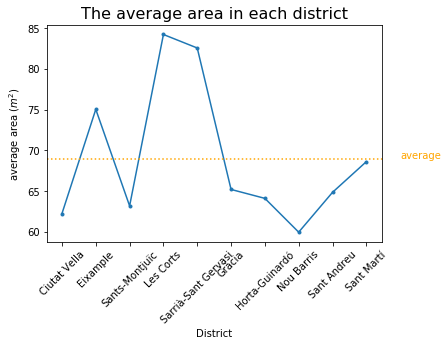

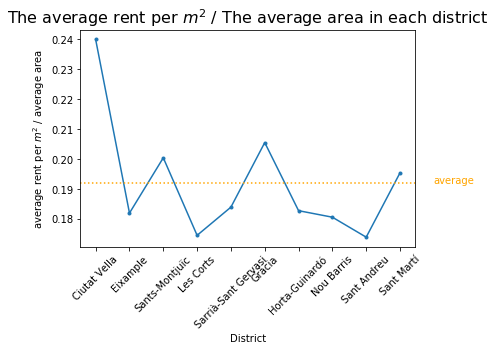

In [7]:
# the average area(m2) of the house in each district
average_m2 = district_mean_price_p.iloc[:,1] / district_mean_price_p.iloc[:,0] ; average_m2
plt.plot(dist_barri.iloc[:,1], average_m2, marker='.')
plt.xticks(rotation = 45)
plt.axhline(y=average_m2.mean(), linestyle=':', c='orange')
plt.text('Sant Marti', average_m2.mean(),'average', c='orange')
plt.xlabel('District')
plt.ylabel('average area ($m^2$)')
plt.title('The average area in each district', fontsize=16)
plt.show()
# 面積越大的房子，平均每平方公尺租金也會較高嗎？ 假設較富有的人較注重生活品質，會租在較好的區域，同時也會租更大間的房子
rentm2_area_ratio = district_mean_price_p.iloc[:,0] / average_m2
plt.plot(dist_barri.iloc[:,1], rentm2_area_ratio, marker='.') 
plt.xticks(rotation = 45)
plt.axhline(y=rentm2_area_ratio.mean(), linestyle=':', c='orange')
plt.text('Sant Marti', rentm2_area_ratio.mean(),'average', c='orange')
plt.xlabel('District')
plt.ylabel('average rent per $m^2$ / average area')
plt.title('The average rent per $m^2$ / The average area in each district', fontsize=16)
plt.show()

由上圖看出在 Ciutat Vella 的房屋雖然每個月的租金是在大約平均的價錢，但是其平均面積很小，因此其每平方公尺的租金相當的高。
這也是由於 Ciutat Vella（舊城區）在 Barcelona 的特性，這區位於巴塞隆納的中心，是巴塞隆納最老的一區，交通十分方便，也是觀光客最多的區域。

其餘行政區每平方公尺平均租金跟每月平均租金則有相同的趨勢。

In [8]:
per_month_df = rent_2018[rent_2018.Lloguer_mitja=='per_month']
per_m2_df = rent_2018[rent_2018.Lloguer_mitja=='per_m2']; per_m2_df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
292,2018,1,1,Ciutat Vella,1,el Raval,per_m2,13.74
293,2018,1,1,Ciutat Vella,2,el Barri Gòtic,per_m2,13.30
294,2018,1,1,Ciutat Vella,3,la Barceloneta,per_m2,17.10
295,2018,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",per_m2,14.68
296,2018,1,2,Eixample,5,el Fort Pienc,per_m2,12.63
...,...,...,...,...,...,...,...,...
579,2018,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,per_m2,16.84
580,2018,4,10,Sant Martí,70,el Besòs i el Maresme,per_m2,11.54
581,2018,4,10,Sant Martí,71,Provençals del Poblenou,per_m2,14.27
582,2018,4,10,Sant Martí,72,Sant Martí de Provençals,per_m2,11.77


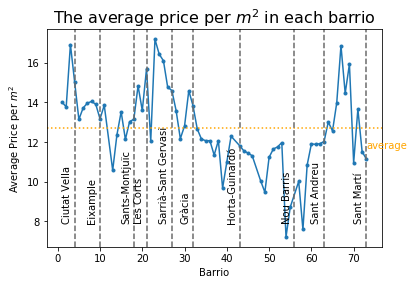

In [9]:
# Average rent per m2 of each barri

per_m2_g = per_m2_df.groupby(['Codi_Barri'])[['Preu']].mean()
per_m2_g = per_m2_g.reset_index()
plt.plot(per_m2_g.Codi_Barri, per_m2_g.Preu, marker='.')
plt.axhline(y=per_m2_g.Preu.mean(), linestyle=':', c='orange')
plt.text(73, per_m2_g.Preu.mean()-1,'average', c='orange')
for i in range(len(dist_barri)):
    plt.axvline(dist_barri.iloc[i,2],c='dimgrey', linestyle='--')
    plt.text(dist_barri.iloc[i,2]-3, 8, dist_barri.iloc[i,1], rotation=90)
plt.xlabel('Barrio')
plt.ylabel('Average Price per $m^2$')
plt.title('The average price per $m^2$ in each barrio', fontsize=16)
plt.show()

#### 比較歷年(2015-2018) 各行政區及社區租金的變化
##### 歷年(2015-2018) 各行政區租金的變化

In [10]:
rent_2017 = pd.read_csv('data/2017_lloguer_preu_trim.csv')
rent_2016 = pd.read_csv('data/2016_lloguer_preu_trim.csv')
rent_2015 = pd.read_csv('data/2015_lloguer_preu_trim.csv')
rent = pd.concat([rent_2015, rent_2016, rent_2017, rent_2018])
rent.Lloguer_mitja.replace('Lloguer mitjà mensual (Euros/mes)', 'per_month', inplace=True)
rent.Lloguer_mitja.replace('Lloguer mitjà per superfície (Euros/m2 mes)', 'per_m2', inplace=True)
rent = rent.dropna(how='any')

# group by the way it counts the price & district code
district_price = rent.groupby(['Any', 'Lloguer_mitja', 'Codi_Districte'])[['Preu']].mean()
district_price = district_price.unstack(0)
district_price.reset_index(inplace=True) 
# create new columns which are the increase percentage of each year 
district_price['increase_p_16']= ((district_price['Preu'][2016] - district_price['Preu'][2015])/district_price['Preu'][2015])*100
district_price['increase_p_17']= ((district_price['Preu'][2017] - district_price['Preu'][2016])/district_price['Preu'][2016])*100
district_price['increase_p_18']= ((district_price['Preu'][2018] - district_price['Preu'][2017])/district_price['Preu'][2017])*100 
district_price

Lloguer_mitja Codi_Districte         Preu                            \
Any                                      2015         2016         2017   
0          per_m2              1    12.840000    14.388125    15.908750   
1          per_m2              2    11.109583    12.307083    13.342083   
2          per_m2              3    10.202333    11.238621    12.570000   
3          per_m2              4    12.401667    13.509167    14.591667   
4          per_m2              5    13.027083    14.777083    15.947083   
5          per_m2              6    11.234500    12.372000    13.507000   
6          per_m2              7     9.773171    10.670250    11.831750   
7          per_m2              8     8.373571     9.103111     9.840889   
8          per_m2              9     8.835556     9.481154    10.765000   
9          per_m2             10    10.744750    11.843750    13.026000   
10      per_month              1   682.972500   752.025000   846.157500   
11      per_month              2   823.833333   903.200000   977.381667   
12      per_month              3   611.302000   662.417241   760.347500   
13      per_month              4  1104.312500  1142.603333  1235.718333   
14      per_month              5  1083.350833  1185.864167  1281.412500   
15      per_month              6   690.794000   756.196000   834.324000   
16      per_month              7   595.011463   649.610000   718.368250   
17      per_month              8   501.618571   517.648261   583.030000   
18      per_month              9   551.302222   586.164615   671.357500   
19      per_month             10   735.776750   800.330750   869.569500   

                 increase_p_16 increase_p_17 increase_p_18  
Any         2018                                            
0      14.932500     12.057048     10.568611     -6.136560  
1      13.656667     10.778982      8.409791      2.357828  
2      12.663214     10.157356     11.846465      0.741562  
3      14.704167      8.930251      8.013078      0.770988  
4      15.192083     13.433552      7.917665     -4.734408  
5      13.400000     10.125061      9.173941     -0.792182  
6      11.717250      9.178999     10.885406     -0.967735  
7      10.827561      8.712408      8.104677     10.026250  
8      11.279200      7.306822     13.541033      4.776591  
9      13.408500     10.228251      9.982058      2.936435  
10    929.106250     10.110583     12.517204      9.802992  
11   1024.575000      9.633826      8.213205      4.828547  
12    799.807143      8.361700     14.783773      5.189685  
13   1238.325833      3.467391      8.149372      0.211011  
14   1254.222500      9.462616      8.057275     -2.121877  
15    873.446000      9.467656     10.331713      4.689066  
16    750.917750      9.176048     10.584543      4.531033  
17    648.947561      3.195593     12.630534     11.306032  
18    731.195200      6.323645     14.533952      8.912941  
19    919.760000      8.773585      8.651267      5.771879

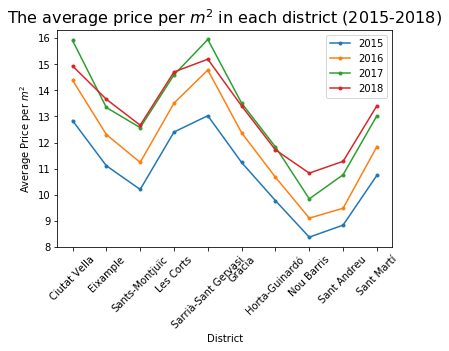

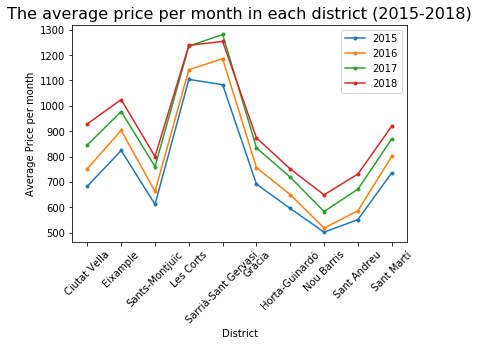

In [11]:
# create two df which contain the price per m2 & price per month repectively
distr_m2 = district_price.iloc[:10,:]
distr_mon = district_price.iloc[10:,:]

# draw the plot of each df
year = (2015,2016,2017,2018)
for y in year:
    plt.plot(dist_barri.iloc[:,1], distr_m2['Preu'][y], marker='.')
plt.legend(year)
plt.xticks(rotation = 45)
plt.xlabel('District')
plt.ylabel('Average Price per $m^2$')
plt.title('The average price per $m^2$ in each district (2015-2018)', fontsize=16)
plt.show()

for y in year:
    plt.plot(dist_barri.iloc[:,1], distr_mon['Preu'][y], marker='.')
plt.legend(year)
plt.xticks(rotation = 45)
plt.xlabel('District')
plt.ylabel('Average Price per month')
plt.title('The average price per month in each district (2015-2018)', fontsize=16)
plt.show()

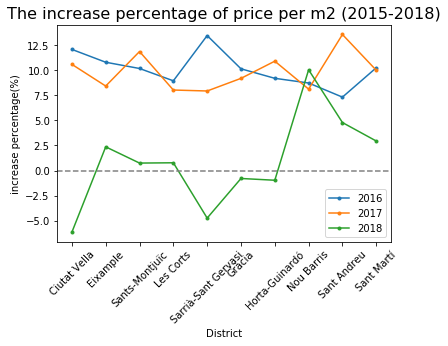

The average increase percentage : 
 from 2015 to 2016: 10.09 
 from 2016 to 2017: 9.84 
 from 2017 to 2018: 0.90


In [12]:
plt.plot(dist_barri.iloc[:,1], distr_m2['increase_p_16'], marker='.')
plt.plot(dist_barri.iloc[:,1], distr_m2['increase_p_17'], marker='.')
plt.plot(dist_barri.iloc[:,1], distr_m2['increase_p_18'], marker='.')
plt.legend((2016, 2017, 2018))
plt.xticks(rotation = 45)
plt.axhline(y=0, linestyle='--',c='gray')
plt.xlabel('District')
plt.ylabel('increase percentage(%)')
plt.title('The increase percentage of price per m2 (2015-2018)', fontsize=16)
plt.show()

print('The average increase percentage : \n from 2015 to 2016: {:.2f}'.format(distr_m2['increase_p_16'].mean()),
      '\n from 2016 to 2017: {:.2f}'.format(distr_m2['increase_p_17'].mean()), 
      '\n from 2017 to 2018: {:.2f}'.format(distr_m2['increase_p_18'].mean()))

<p>由上圖可看出2017年平均租金（每平方公尺）成長率較2016年有些許的趨緩，但並非各個行政區相同。</p>
<p>2018年的平均租金（每平方公尺）成長率則大幅下降，其中十個行政區中甚至有四個行政區成長率為負，平均租金（每平方公尺）下降，其餘除了Nou Barris之外成長率也都大幅下降。其下降的原因推測可能跟[西班牙修改有關租屋的法律有關](https://www.thelocal.es/20181218/what-you-need-to-know-about-spains-2018-rent-law-changes)。</p>
<p>其中Nou Barris 本身平均租金就是十區中最低，即便2018成長率不但沒有降低反些微增加，仍然是十區中最低。</p>

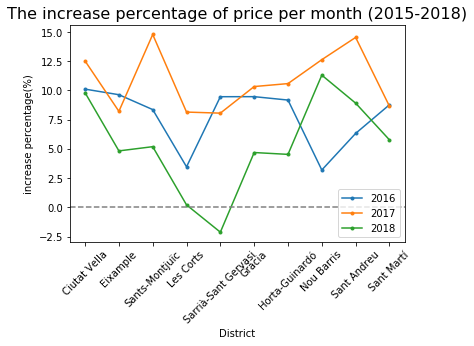

The average increase percentage : 
 from 2015 to 2016: 7.80 
 from 2016 to 2017: 10.85 
 from 2017 to 2018: 5.31


In [13]:
plt.plot(dist_barri.iloc[:,1], distr_mon['increase_p_16'], marker='.')
plt.plot(dist_barri.iloc[:,1], distr_mon['increase_p_17'], marker='.')
plt.plot(dist_barri.iloc[:,1], distr_mon['increase_p_18'], marker='.')
plt.legend((2016, 2017, 2018), loc='lower right')
plt.xticks(rotation = 45)
plt.axhline(y=0, linestyle='--',c='gray')
plt.xlabel('District')
plt.ylabel('increase percentage(%)')
plt.title('The increase percentage of price per month (2015-2018)', fontsize=16)
plt.show()

print('The average increase percentage : \n from 2015 to 2016: {:.2f}'.format(distr_mon['increase_p_16'].mean()),
      '\n from 2016 to 2017: {:.2f}'.format(distr_mon['increase_p_17'].mean()), 
      '\n from 2017 to 2018: {:.2f}'.format(distr_mon['increase_p_18'].mean()))

<p>然而當我們看到每月租金成長的部分（上圖），可以發現2018年僅有Srria-Sant Gervasi 一區的月租成長率為負，月租些許下降，但即便如此仍為十區中月租最高。其餘的行政區則大部分有降低的趨勢。 但從2015年到2018年這四年來看，並沒有一個明確且統一的趨勢。</p>

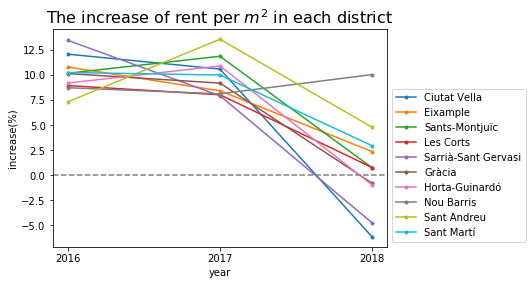

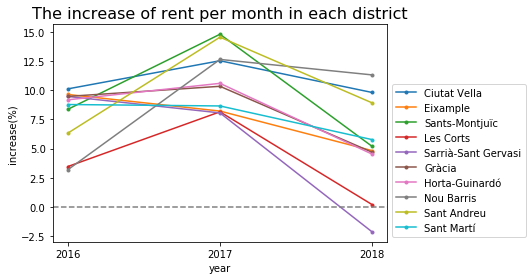

In [14]:
y = ('2016', '2017', '2018')

for i in range(len(distr_m2)):
    plt.plot(y, distr_m2.iloc[i,6:], marker='.')
plt.axhline(y=0, linestyle='--',c='gray')
plt.title('The increase of rent per $m^2$ in each district', fontsize=16)
plt.xlabel('year')
plt.ylabel('increase(%)')
plt.legend(dist_barri.iloc[:,1], loc='lower left', bbox_to_anchor=(1.,0.))
plt.show()

for i in range(len(distr_mon)):
    plt.plot(y, distr_mon.iloc[i,6:], marker='.')
plt.axhline(y=0, linestyle='--',c='gray')
plt.title('The increase of rent per month in each district', fontsize=16)
plt.xlabel('year')
plt.ylabel('increase(%)')
plt.legend(dist_barri.iloc[:,1], loc='lower left', bbox_to_anchor=(1.,0.))
plt.show()

<p>由上圖歷年各行政區的成長率走勢，可以看出每平方公尺租金在2018年有一個明顯的下降，但月租卻在2017年有一個明顯的增長，兩者不相同。
是否暗指平均租房的面積有所改變? 可能需配合當地政策改變做進一步的討論。</p>  

##### 歷年(2015-2018) 各社區租金的變化

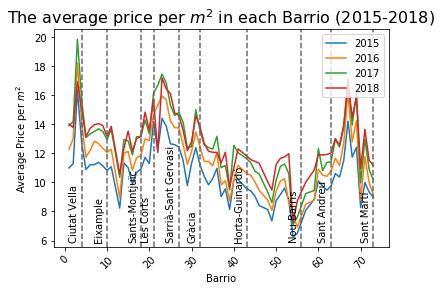

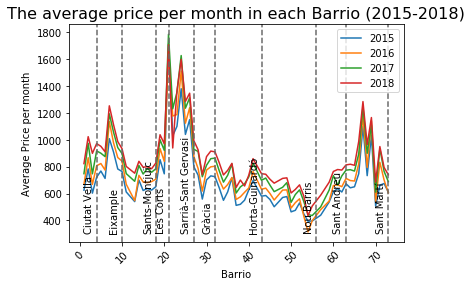

In [15]:
rent_barrio = rent.groupby(['Any','Lloguer_mitja', 'Codi_Barri'])[['Preu']].mean()
rent_barrio = rent_barrio.unstack(0)
rent_barrio.reset_index(inplace=True) 
# create new columns which are the increase percentage of each year 
rent_barrio['increase_p_16']= ((rent_barrio['Preu'][2016] - rent_barrio['Preu'][2015])/rent_barrio['Preu'][2015])*100
rent_barrio['increase_p_17']= ((rent_barrio['Preu'][2017] - rent_barrio['Preu'][2016])/rent_barrio['Preu'][2016])*100
rent_barrio['increase_p_18']= ((rent_barrio['Preu'][2018] - rent_barrio['Preu'][2017])/rent_barrio['Preu'][2017])*100; rent_barrio

# create two df which contain the price per m2 & price per month repectively
barrio_m2 = rent_barrio.iloc[:73,:]
barrio_mon = rent_barrio.iloc[73:,:]
barrio_m2 = barrio_m2.dropna(how='any')
barrio_mon = barrio_mon.dropna(how='any')

# draw the plot of each df
year = (2015,2016,2017,2018)
for y in year:
    plt.plot(barrio_m2['Codi_Barri'], barrio_m2['Preu'][y])
for i in range(len(dist_barri)):
    plt.axvline(dist_barri.iloc[i,2],c='dimgrey', linestyle='--')
    plt.text(dist_barri.iloc[i,2]-3, 6, dist_barri.iloc[i,1], rotation=90)
plt.legend(year, loc='upper right')
plt.xticks(rotation = 45)
plt.xlabel('Barrio')
plt.ylabel('Average Price per $m^2$')
plt.title('The average price per $m^2$ in each Barrio (2015-2018)', fontsize=16)
plt.show()

for y in year:
    plt.plot(barrio_mon['Codi_Barri'], barrio_mon['Preu'][y])
for i in range(len(dist_barri)):
    plt.axvline(dist_barri.iloc[i,2],c='dimgrey', linestyle='--')
    plt.text(dist_barri.iloc[i,2]-3, 320, dist_barri.iloc[i,1], rotation=90)
plt.legend(year)
plt.xticks(rotation = 45)
plt.xlabel('Barrio')
plt.ylabel('Average Price per month')
plt.title('The average price per month in each Barrio (2015-2018)', fontsize=16)
plt.show()

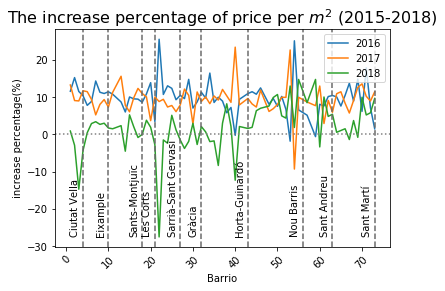

The average increase percentage : 
 from 2015 to 2016: 9.85 
 from 2016 to 2017: 9.34 
 from 2017 to 2018: 1.79


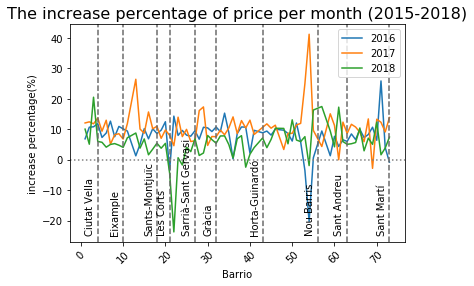

The average increase percentage : 
 from 2015 to 2016: 7.71 
 from 2016 to 2017: 10.69 
 from 2017 to 2018: 5.51


In [16]:
plt.plot(barrio_m2['Codi_Barri'], barrio_m2['increase_p_16'])
plt.plot(barrio_m2['Codi_Barri'], barrio_m2['increase_p_17'])
plt.plot(barrio_m2['Codi_Barri'], barrio_m2['increase_p_18'])
for i in range(len(dist_barri)):
    plt.axvline(dist_barri.iloc[i,2],c='dimgrey', linestyle='--')
    plt.text(dist_barri.iloc[i,2]-3, -27, dist_barri.iloc[i,1], rotation=90)
plt.legend((2016, 2017, 2018), loc='upper right')
plt.xticks(rotation = 45)
plt.axhline(y=0, linestyle=':',c='gray')
plt.xlabel('Barrio')
plt.ylabel('increase percentage(%)')
plt.title('The increase percentage of price per $m^2$ (2015-2018)', fontsize=16)
plt.show()

print('The average increase percentage : \n from 2015 to 2016: {:.2f}'.format(barrio_m2['increase_p_16'].mean()),
      '\n from 2016 to 2017: {:.2f}'.format(barrio_m2['increase_p_17'].mean()), 
      '\n from 2017 to 2018: {:.2f}'.format(barrio_m2['increase_p_18'].mean()))

plt.plot(barrio_m2['Codi_Barri'], barrio_mon['increase_p_16'])
plt.plot(barrio_m2['Codi_Barri'], barrio_mon['increase_p_17'])
plt.plot(barrio_m2['Codi_Barri'], barrio_mon['increase_p_18'])
for i in range(len(dist_barri)):
    plt.axvline(dist_barri.iloc[i,2],c='dimgrey', linestyle='--')
    plt.text(dist_barri.iloc[i,2]-3, -24, dist_barri.iloc[i,1], rotation=90)
plt.legend((2016, 2017, 2018), loc='upper right')
plt.xticks(rotation = 45)
plt.axhline(y=0, linestyle=':',c='gray')
plt.xlabel('Barrio')
plt.ylabel('increase percentage(%)')
plt.title('The increase percentage of price per month (2015-2018)', fontsize=16)
plt.show()

print('The average increase percentage : \n from 2015 to 2016: {:.2f}'.format(barrio_mon['increase_p_16'].mean()),
      '\n from 2016 to 2017: {:.2f}'.format(barrio_mon['increase_p_17'].mean()), 
      '\n from 2017 to 2018: {:.2f}'.format(barrio_mon['increase_p_18'].mean()))

當將範圍縮小到社區(Barrio)時，會發現租金的變化並沒有上述的趨勢，每個社區都有不同的走向

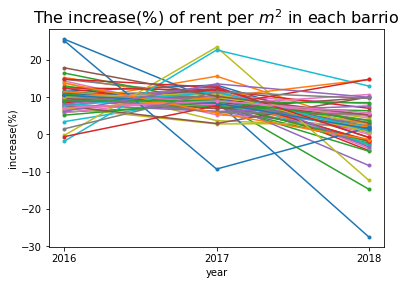

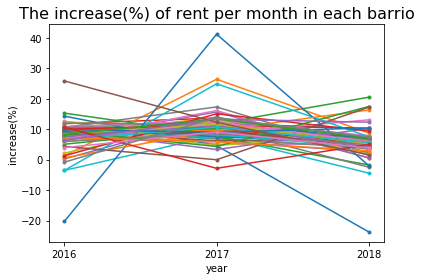

In [17]:
y = ('2016','2017','2018')
for i in range(len(barrio_m2)):
    plt.plot(y, barrio_m2.iloc[i,6:], marker='.')
plt.title('The increase(%) of rent per $m^2$ in each barrio', fontsize=16)
plt.xlabel('year')
plt.ylabel('increase(%)')
plt.show()

for i in range(len(barrio_mon)):
    plt.plot(y, barrio_mon.iloc[i,6:], marker='.')
plt.title('The increase(%) of rent per month in each barrio', fontsize=16)
plt.xlabel('year')
plt.ylabel('increase(%)')
plt.show()

### 各行政區外來移民資料
- 國籍資料：包含各行政區中人數前二十多的移民國籍，並加入所屬洲別
- 各行政區外國移民占人口比的資料

In [18]:
# read the file of nations and the continent they belong
continent = pd.read_csv('data/pais_continent.csv').iloc[:,1:4]
continent.columns = ['Nacionalitat', 'Regio', 'Continent']
# delete the space in the data
for i in range(len(continent)):
    for j in range(continent.shape[1]):
        if type(continent.iloc[i,j]) == str:
            continent.iloc[i,j] = " ".join(continent.iloc[i,j].split())

In [19]:
# read the file and drop the NA
nacionalitat_districte = pd.read_csv('data/nacionalitat_districte.csv')
nacionalitat_districte = nacionalitat_districte.dropna(how='any')
# delete the space in the data
for i in range(len(nacionalitat_districte)):
    for j in range(nacionalitat_districte.shape[1]):
        if type( nacionalitat_districte.iloc[i,j]) == str:
            nacionalitat_districte.iloc[i,j] = " ".join(nacionalitat_districte.iloc[i,j].split())
# change the data type from str to float
for i in range(len(nacionalitat_districte)):
    for j in(3,4):
        nacionalitat_districte.iloc[i,j] = float(nacionalitat_districte.iloc[i,j])
# change the column's name
nacionalitat_districte.columns = ['Codi', 'Districte', 'Nacionalitat', 'Nombre', '%']

nacionalitat_distri_c = pd.merge(nacionalitat_districte, continent, on='Nacionalitat', how='left')
nacionalitat_distri_c


,Codi,Districte,Nacionalitat,Nombre,%,Regio,Continent
0,1,CIUTAT VELLA,Població estrangera,47.307,100,NaN,NaN
1,1,CIUTAT VELLA,Pakistan,6.302,13.3,Àsia meridional,Àsia
2,1,CIUTAT VELLA,Itàlia,5.354,11.3,Europa meridional,Europa
3,1,CIUTAT VELLA,Filipines,4.622,9.8,Àsia sud-oriental,Àsia
4,1,CIUTAT VELLA,Bangladesh,3.315,7,Àsia meridional,Àsia
...,...,...,...,...,...,...,...
215,10,SANT MARTÍ,Equador,914,2.2,Amèrica del Sud,Amèrica
216,10,SANT MARTÍ,Hondures,858,2.1,Amèrica central,Amèrica
217,10,SANT MARTÍ,República Dominicana,747,1.8,Carib,Amèrica
218,10,SANT MARTÍ,Portugal,721,1.7,Europa meridional,Europa


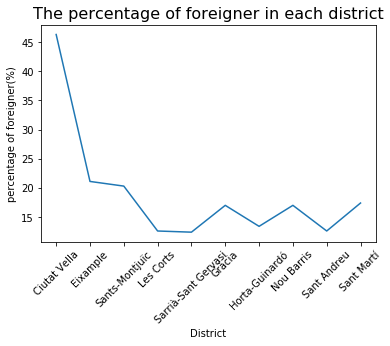

Nombre                                   %             \
Nacionalitat Espanyola Estrangera TOTAL POBLACIÓ Espanyola Estrangera   
Codi                                                                    
1                54831      47287         102138      53.7       46.3   
2               210497      56192         266754      78.9       21.1   
3               145160      37005         182184      79.7       20.3   
4                71835      10334          82182      87.4       12.6   
5               131233      18580         149837      87.6       12.4   
6               100950      20611         121593        83         17   
7               147380      22862         170249      86.6       13.4   
8               139773      28546         168327        83         17   
9               129793      18757         148560      87.4       12.6   
10              195858      41228         237112      82.6       17.4   

                             
Nacionalitat TOTAL POBLACIÓ  
Codi                         
1                       100  
2                       100  
3                       100  
4                       100  
5                       100  
6                       100  
7                       100  
8                       100  
9                       100  
10                      100

In [132]:
# load the data of the percentage of foreigner in each district
estrangera = pd.read_csv('data/estrangera.csv')
# delete the space in the data
for i in range(len(estrangera)):
    for j in range(estrangera.shape[1]):
        if type(estrangera.iloc[i,j]) == str:
            estrangera.iloc[i,j] = " ".join(estrangera.iloc[i,j].split())
# change the data type from str to float
for i in range(len(estrangera)):
    for j in(3,4):
        estrangera.iloc[i,j] = float(estrangera.iloc[i,j])
# pivot the dataframe
estrangera = estrangera.pivot(index='Codi', columns='Nacionalitat', values=['Nombre', '%'])
# plot the percentage of foreigner in each district
plt.plot(dist_barri.iloc[:,1], estrangera[('%','Estrangera')])
plt.xticks(rotation = 45)
plt.xlabel('District')
plt.ylabel('percentage of foreigner(%)')
plt.title('The percentage of foreigner in each district', fontsize=16)
plt.show()
estrangera

In [152]:
# cleaning the data by region and continent
nacionalitat_region = nacionalitat_distri_c.groupby(['Codi', 'Districte', 'Regio'])[['%']].sum()
nacionalitat_region.reset_index(inplace=True)
nacionalitat_region = nacionalitat_region.pivot(index= 'Codi', columns='Regio', values='%')
nacionalitat_region.fillna(0, inplace=True)
nacionalitat_region['Else']= 100 - nacionalitat_region.sum(axis=1)


nacionalitat_continent = nacionalitat_distri_c.groupby(['Codi', 'Districte', 'Continent'])[['%']].sum()
nacionalitat_continent.reset_index(inplace=True)
nacionalitat_continent = nacionalitat_continent.pivot(index= 'Codi', columns='Continent', values='%')
nacionalitat_continent['Else']= 100 - nacionalitat_continent.sum(axis=1)

#nacionalitat_region
nacionalitat_continent

Continent,Amèrica,Europa,Àfrica,Àsia,Else
Codi,,,,,
1,9.7,27.8,5.7,35.1,21.7
2,24.5,32.2,1.9,15.1,26.3
3,24.8,21.3,5.3,25.3,23.3
4,27.4,30.9,2.1,10.2,29.4
5,22.2,40.3,1.9,7.5,28.1
6,22.8,37.7,2.7,9.4,27.4
7,39.2,20.8,4.5,10.4,25.1
8,44.4,10.8,8.2,20.6,16.0
9,34.3,16.3,6.9,21.1,21.4


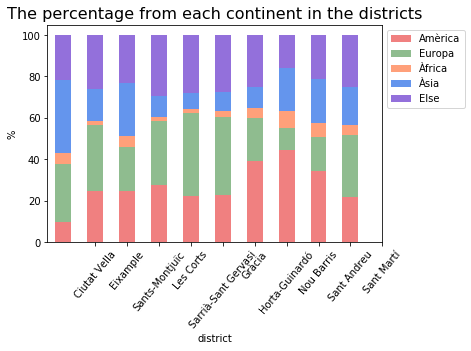

In [149]:
# plot the percentage from each continent in the districts
color_c = ['lightcoral', 'darkseagreen', 'lightsalmon', 'cornflowerblue', 'mediumpurple']
nacionalitat_continent.plot(kind='bar', stacked=True, color=color_c)
plt.xticks(nacionalitat_continent.index, dist_barri.iloc[:,1].values, rotation = 50)
plt.legend(nacionalitat_continent.columns, loc='upper left', bbox_to_anchor=(1.,1.))
plt.xlabel('district')
plt.ylabel('%')
plt.title('The percentage from each continent in the districts', fontsize=16)
plt.show()


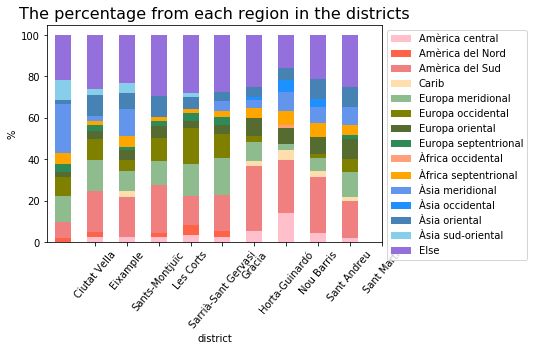

In [155]:
# plot the percentage from each region in the districts
color_r = ['pink', 'tomato', 'lightcoral', 'navajowhite', 'darkseagreen', 'olive', 'darkolivegreen', 'seagreen', 'lightsalmon','orange','cornflowerblue', 'dodgerblue', 'steelblue', 'skyblue', 'mediumpurple']
nacionalitat_region.plot(kind='bar', stacked=True, color=color_r)
plt.xticks(nacionalitat_region.index, dist_barri.iloc[:,1].values, rotation = 50)
plt.legend(nacionalitat_region.columns, loc='upper left', bbox_to_anchor=(1.,1.))
plt.xlabel('district')
plt.ylabel('%')
plt.title('The percentage from each region in the districts', fontsize=16)

plt.show()

In [108]:
# 2018 rent per m2 in 10 districts
m2_2018 = district_mean_price_p[('Preu', 'per_m2')]

#slope, intercept = np.polyfit(nacionalitat_continent.Amèrica, m2_2018, 1) # 1: Linear modeling
nacionalitat_continent
#print(slope, intercept)

Continent,Amèrica,Europa,Àfrica,Àsia,Else
Districte,,,,,
CIUTAT VELLA,9.7,27.8,5.7,35.1,21.7
EIXAMPLE,24.5,32.2,1.9,15.1,26.3
GRÀCIA,22.8,37.7,2.7,9.4,27.4
HORTA-GUINARDÓ,39.2,20.8,4.5,10.4,25.1
LES CORTS,27.4,30.9,2.1,10.2,29.4
NOU BARRIS,44.4,10.8,8.2,20.6,16.0
SANT ANDREU,34.3,16.3,6.9,21.1,21.4
SANT MARTÍ,21.5,30.3,4.8,18.3,25.1
SANTS-MONTJUÏC,24.8,21.3,5.3,25.3,23.3


In [159]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import f_regression
#X = nacionalitat_continent.iloc[:, :4]
X = nacionalitat_region.iloc[:,:-1] # except 'Else'
y = m2_2018
lm = LinearRegression()
lm.fit(X, y)
print('Intercept:', lm.intercept_,'\n')
print(pd.DataFrame({'region': nacionalitat_region.columns[:-1], 'coef': lm.coef_, 'p-value': f_regression(X, y)[1]}))
# p-value 不顯著

print("\nR-squared:", lm.score(X, y))
y_2017 = district_price[('Preu', 2017)].iloc[:10,] # rent of districts in 2017 
print("\nR-squared of 2017:", lm.score(X, y_2017))


Intercept: 9.647881026321064 

                  region      coef   p-value
0        Amèrica central  0.117520  0.023041
1       Amèrica del Nord  0.005999  0.010855
2        Amèrica del Sud -0.109563  0.008175
3                  Carib -0.410956  0.000475
4      Europa meridional -0.191860  0.008083
5      Europa occidental  0.110517  0.000329
6        Europa oriental  0.139705  0.031069
7   Europa septentrional -0.008009  0.001416
8      Àfrica occidental  0.073600  0.109824
9   Àfrica septentrional -0.237768  0.030245
10       Àsia meridional  0.085642  0.945603
11       Àsia occidental  0.026526  0.003797
12         Àsia oriental  0.053212  0.765435
13     Àsia sud-oriental  0.089848  0.209842
14                  Else  0.255586  0.031332

R-squared: 1.0

R-squared of 2017: 0.9161539062437037


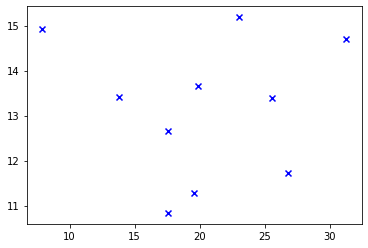

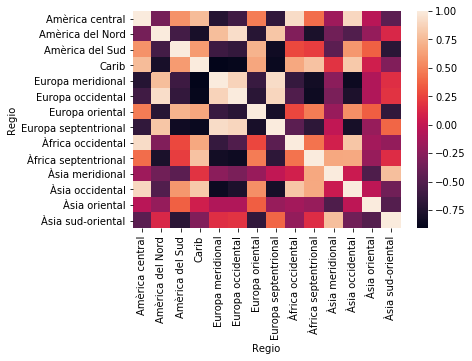

In [31]:
# scatter plot of the South America & rent
plt.scatter(X.iloc[:,2], y ,color='blue',marker='x')
#plt.plot(x_test,regr.predict(x_test),color='green')
plt.show()

# heatmap of the correlation of each region
import seaborn as sns
sns.heatmap(X.corr())
plt.show()

In [162]:
nacionalitat_region['rent_2018'] = np.array(district_mean_price_p[('Preu', 'per_m2')])
nacionalitat_region

from statsmodels.formula.api import ols
#model = ols(formula = 'rent_2018 ~ X', data=nacionalitat_region.drop(['Else'], axis=1)).fit()
#print(model.summary())

import statsmodels.api as sm
#X2 = sm.add_constant(X)
#est = sm.OLS(y, X2).fit()
#est.summary()

In [158]:
X = estrangera[[('Nombre', 'Estrangera'), ('%', 'Estrangera')]]
y = m2_2018

lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)
print(f_regression(X, y)[1]) # p-value
print("R-squared:", lm.score(X, y))

#slope, intercept = np.polyfit(X, y, 1) # 1: Linear modeling
#print(slope, intercept)

12.41524649572825
[-2.07399718e-05  7.30128666e-02]
[0.76700153 0.31722759]
R-squared: 0.14777971937437107


In [ ]:
estrangera

In [160]:
X = estrangera[[('%','Estrangera'), ('Nombre', 'Estrangera')]] # 外國人比例
y = m2_2018.values
lm = LinearRegression()
lm.fit(X, y)
print('Intercept:', lm.intercept_,'\n')
print(lm.coef_)
print(f_regression(X, y)[1]) # p-value (不顯著)

print("\nR-squared:", lm.score(X, y))z

SyntaxError: invalid syntax (<ipython-input-160-17ccd35ca50a>, line 9)

[EPdata](https://www.epdata.es/datos/crimen-asesinatos-robos-secuestros-otros-delitos-registrados-cada-municipio/6/barcelona/1325)
Barcelona Victim of Crime Surveys 2016


In [161]:
crime = pd.read_csv('data/estadistica_del_crimen_en.csv')
crime

,Año,Periodo,Parámetro,Denuncias
0,2017,Trimestre 3,Agresión sexual con penetración,92.000
1,2017,Trimestre 3,Homicidios dolosos y asesinatos consumados,23.000
2,2017,Trimestre 3,Hurtos,68.276
3,2017,Trimestre 3,"Robos con fuerza en domicilios, establecimient...",5.701
4,2017,Trimestre 3,Robos con violencia e intimidación,7.340
...,...,...,...,...
85,2019,Trimestre 4,Robos con violencia e intimidación,14.750
86,2019,Trimestre 4,Secuestro,0.000
87,2019,Trimestre 4,Sustracciones de vehículos,4.643
88,2019,Trimestre 4,Total,200.225
